In [7]:
from sklearn.datasets import load_boston

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')
plt.style.use(['dark_background', 'seaborn-deep'])

In [8]:
boston = load_boston()

X = pd.DataFrame(data=boston.data, columns=boston.feature_names)
y = pd.DataFrame(data=boston.target, columns=['target'])

In [9]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [10]:
y

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


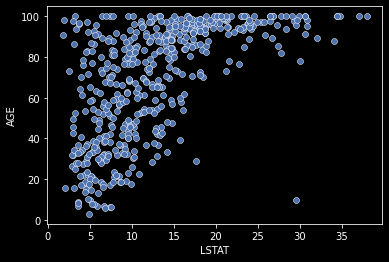

In [18]:
sns.scatterplot(data=X, x='LSTAT', y='AGE');

In [25]:
# 데이터프레임 -> 넘파이 배열
X[['LSTAT','AGE']].values

array([[ 4.98, 65.2 ],
       [ 9.14, 78.9 ],
       [ 4.03, 61.1 ],
       ...,
       [ 5.64, 91.  ],
       [ 6.48, 89.3 ],
       [ 7.88, 80.8 ]])

In [29]:
x_len = len(X[['LSTAT','AGE']].values)
x_len

506

In [35]:
X_train = X[['LSTAT','AGE']].values[:int(x_len*(0.8))]
X_test = X[['LSTAT','AGE']].values[int(x_len*(0.8)):]

y_train = y.values[:int(x_len*(0.8))]
y_test = y.values[int(x_len*(0.8)):]

In [36]:
print(X_train.shape, X_test.shape)

(404, 2) (102, 2)


In [38]:
print(y_train.shape, y_test.shape)

(404, 1) (102, 1)


In [39]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
# x1(LSTAT), x2(AGE)에 대한 가중치
model.coef_

array([[-1.09627959,  0.05492037]])

In [41]:
X_train

array([[  4.98,  65.2 ],
       [  9.14,  78.9 ],
       [  4.03,  61.1 ],
       [  2.94,  45.8 ],
       [  5.33,  54.2 ],
       [  5.21,  58.7 ],
       [ 12.43,  66.6 ],
       [ 19.15,  96.1 ],
       [ 29.93, 100.  ],
       [ 17.1 ,  85.9 ],
       [ 20.45,  94.3 ],
       [ 13.27,  82.9 ],
       [ 15.71,  39.  ],
       [  8.26,  61.8 ],
       [ 10.26,  84.5 ],
       [  8.47,  56.5 ],
       [  6.58,  29.3 ],
       [ 14.67,  81.7 ],
       [ 11.69,  36.6 ],
       [ 11.28,  69.5 ],
       [ 21.02,  98.1 ],
       [ 13.83,  89.2 ],
       [ 18.72,  91.7 ],
       [ 19.88, 100.  ],
       [ 16.3 ,  94.1 ],
       [ 16.51,  85.7 ],
       [ 14.81,  90.3 ],
       [ 17.28,  88.8 ],
       [ 12.8 ,  94.4 ],
       [ 11.98,  87.3 ],
       [ 22.6 ,  94.1 ],
       [ 13.04, 100.  ],
       [ 27.71,  82.  ],
       [ 18.35,  95.  ],
       [ 20.34,  96.9 ],
       [  9.68,  68.2 ],
       [ 11.41,  61.4 ],
       [  8.77,  41.5 ],
       [ 10.13,  30.2 ],
       [  4.32,  21.8 ],


In [47]:
# bias
model.intercept_

array([33.08556201])

In [56]:
# 테스트셋 
model.predict(X_test)

array([[ 7.75962683],
       [13.38509446],
       [12.99043381],
       [25.27972796],
       [ 9.52048549],
       [16.89318913],
       [27.49421272],
       [15.31454653],
       [ 0.89846998],
       [16.56430526],
       [-1.96281974],
       [ 6.73067738],
       [ 9.79928139],
       [ 8.77407911],
       [15.97231428],
       [12.35757279],
       [22.11147996],
       [21.10788409],
       [22.43904455],
       [12.22693423],
       [18.15078267],
       [11.58670653],
       [19.1636816 ],
       [21.4898158 ],
       [13.78290648],
       [11.93753727],
       [18.47583426],
       [16.67880817],
       [24.00536251],
       [20.13140794],
       [21.67243615],
       [12.77060336],
       [18.42178631],
       [ 9.5810043 ],
       [ 0.61763132],
       [13.15970814],
       [13.92146286],
       [17.02444478],
       [20.39032101],
       [17.91272915],
       [12.31037873],
       [12.00322893],
       [18.87707216],
       [20.36803368],
       [18.63065396],
       [17

In [55]:
# 테스트
model.predict([[20,20]])

array([[12.25837777]])

In [60]:
# loss 계산해보기
sum(abs(model.predict(X_test) - y_test))

array([420.47273744])

In [88]:
X_test[:,0]

array([27.38, 22.98, 23.34, 12.13, 26.4 , 19.78, 10.11, 21.22, 34.37,
       20.08, 36.98, 29.05, 25.79, 26.64, 20.62, 22.74, 15.02, 15.7 ,
       14.1 , 23.29, 17.16, 24.39, 15.69, 14.52, 21.52, 24.08, 17.64,
       19.69, 12.03, 16.22, 15.17, 23.27, 18.05, 26.45, 34.02, 22.88,
       22.11, 19.52, 16.59, 18.85, 23.79, 23.98, 17.79, 16.44, 18.13,
       19.31, 17.44, 17.73, 17.27, 16.74, 18.71, 18.13, 19.01, 16.94,
       16.23, 14.7 , 16.42, 14.65, 13.99, 10.29, 13.22, 14.13, 17.15,
       21.32, 18.13, 14.76, 16.29, 12.87, 14.36, 11.66, 18.14, 24.1 ,
       18.68, 24.91, 18.03, 13.11, 10.74,  7.74,  7.01, 10.42, 13.34,
       10.58, 14.98, 11.45, 18.06, 23.97, 29.68, 18.07, 13.35, 12.01,
       13.59, 17.6 , 21.14, 14.1 , 12.92, 15.1 , 14.33,  9.67,  9.08,
        5.64,  6.48,  7.88])

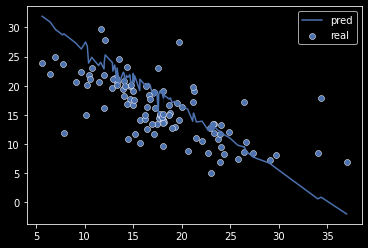

In [99]:
sns.lineplot(x=X_test[:,0], y=model.predict(X_test).reshape(-1), label='pred')
sns.scatterplot(x=X_test[:,0], y=y_test.reshape(-1), label='real')

plt.show()